### Heart Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import scipy as sp
import matplotlib.pyplot as pt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
from sklearn.tree import export_graphviz
%matplotlib inline


df=pd.read_csv("hospital.csv",na_values=["Not Available","number of cases is too small (fewer than 25) to reliably tell how well the hospital is performing",
                                        "Number of Cases Too Small","No data are available from the hospital for this measure"])
df.set_index('Provider Number', inplace=True)
df.fillna(0, inplace=True)
df.head(10)

,Hospital Name,Address 1,City,State,ZIP Code,County Name,Phone Number,Hospital 30-Day Death (Mortality) Rates from Heart Attack,Comparison to U.S. Rate - Hospital 30-Day Death (Mortality) Rates from Heart Attack,Lower Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Attack,...,Lower Readmission Estimate - Hospital 30-Day Readmission Rates from Heart Attack,Upper Readmission Estimate - Hospital 30-Day Readmission Rates from Heart Attack,Number of Patients - Hospital 30-Day Readmission Rates from Heart Attack,Footnote - Hospital 30-Day Readmission Rates from Heart Attack,Hospital 30-Day Readmission Rates from Heart Failure,Comparison to U.S. Rate - Hospital 30-Day Readmission Rates from Heart Failure,Lower Readmission Estimate - Hospital 30-Day Readmission Rates from Heart Failure,Upper Readmission Estimate - Hospital 30-Day Readmission Rates from Heart Failure,Number of Patients - Hospital 30-Day Readmission Rates from Heart Failure,Footnote - Hospital 30-Day Readmission Rates from Heart Failure
Provider Number,,,,,,,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,14.3,No Different than U.S. National Rate,12.1,...,16.6,21.7,728.0,0.0,23.7,No Different than U.S. National Rate,21.3,26.5,891.0,0.0
10002,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,18.5,No Different than U.S. National Rate,14.7,...,0.0,0.0,21.0,0.0,22.5,No Different than U.S. National Rate,19.2,26.1,264.0,0.0
10003,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,18.1,No Different than U.S. National Rate,14.8,...,14.9,21.5,342.0,0.0,19.8,Better than U.S. National Rate,17.2,22.9,614.0,0.0
10004,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,0.0,0,0.0,...,0.0,0.0,1.0,0.0,27.1,No Different than U.S. National Rate,22.4,31.9,135.0,0.0
10005,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,0.0,0,0.0,...,0.0,0.0,4.0,0.0,24.7,No Different than U.S. National Rate,19.9,30.2,59.0,0.0
10006,MARSHALL MEDICAL CENTER NORTH,8000 ALABAMA HIGHWAY 69,GUNTERSVILLE,AL,35976,MARSHALL,2565718000,0.0,0,0.0,...,0.0,0.0,13.0,0.0,23.9,No Different than U.S. National Rate,20.1,28.2,173.0,0.0
10007,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,17.7,No Different than U.S. National Rate,14.2,...,18.5,26.8,213.0,0.0,21.3,No Different than U.S. National Rate,18.2,24.7,417.0,0.0
10008,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,18.0,No Different than U.S. National Rate,14.1,...,15.8,24.6,79.0,0.0,26.4,No Different than U.S. National Rate,22.1,31.3,160.0,0.0
10009,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,SHELBY,2056208100,15.9,No Different than U.S. National Rate,12.6,...,16.8,24.4,199.0,0.0,25.1,No Different than U.S. National Rate,21.6,28.7,323.0,0.0


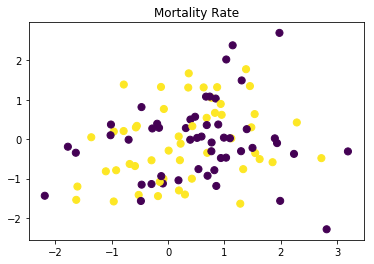

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

pt.figure()
pt.title('Mortality Rate')
X_heart, y_heart = make_classification(n_samples = 100,n_features=15,n_redundant=0, n_informative=2,n_clusters_per_class=1, flip_y = 0.1,class_sep = 0.5, random_state=0)
pt.scatter(X_heart[:, 0], X_heart[:, 1], c=y_heart,marker= 'o', s=50)
pt.show()


### Linear SVC

In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Heart dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Heart dataset
Accuracy of Linear SVC classifier on training set: 0.85
Accuracy of Linear SVC classifier on test set: 0.56


### RBF Kernel

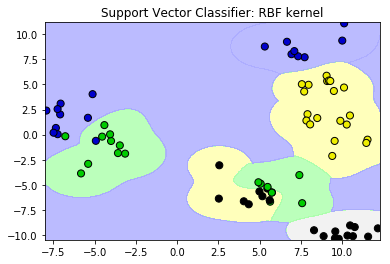

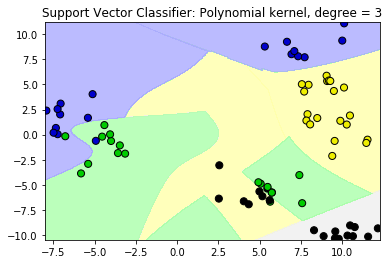

In [4]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_heart_1, y_heart_1 = make_blobs(n_samples = 100, n_features = 2, centers = 8,cluster_std = 1.3, random_state = 4)

X_train, X_test, y_train, y_test = train_test_split(X_heart_1, y_heart_1, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),X_train, y_train, None, None,'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3).fit(X_train, y_train), X_train,y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

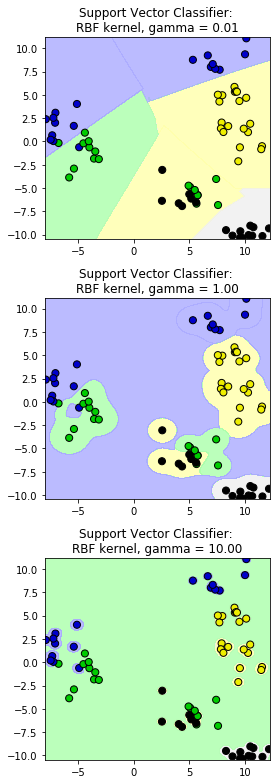

In [5]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_heart_1, y_heart_1, random_state = 0)
fig, subaxes = pt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,None, None, title, subplot)
    pt.tight_layout()

### Train Test Score

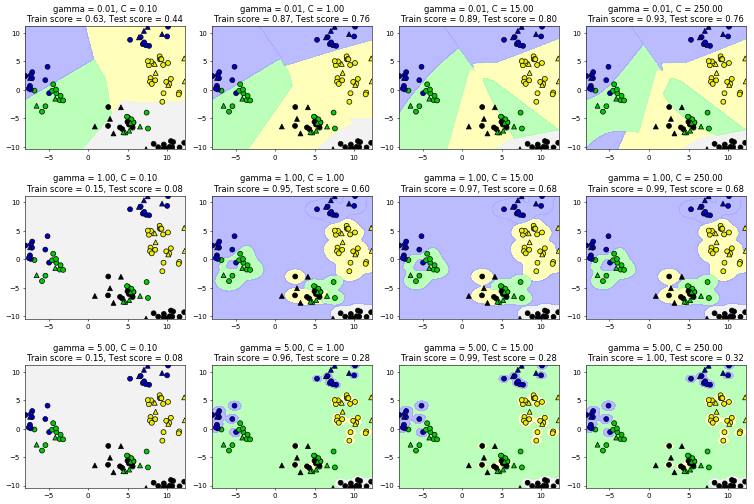

In [6]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_heart_1, y_heart_1, random_state = 0)
fig, subaxes = pt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,X_test, y_test, title,subplot)
        pt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

### Accuracy Score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart,random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Pnuemonia dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Pnuemonia dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.64


### Accuracy

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Pnuemonia dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

Pnuemonia dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.85
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.64


### Confusion Matrix

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

X_heart, y_heart = make_classification(n_samples = 100, n_features=2,n_redundant=0, n_informative=2,n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart,random_state = 0)


svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[10  5]
 [ 1  9]]


### ROC Curve-AUC

gamma = 1.00  accuracy = 0.88   AUC = 0.90


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


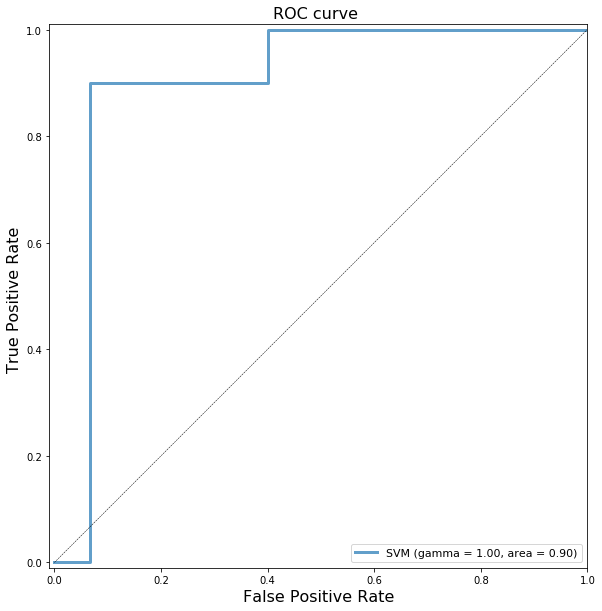

In [11]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as pt

X_heart, y_heart = make_classification(n_samples = 100, n_features=2,n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y = 0.1,class_sep = 0.5, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, random_state=0)

pt.figure(figsize=(20,10))
pt.xlim([-0.01, 1.00])
pt.ylim([-0.01, 1.01])

svm = SVC(gamma=1).fit(X_train, y_train)
y_score_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
accuracy_svm = svm.score(X_test, y_test)
print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(1, accuracy_svm, roc_auc_svm))
pt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7,label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(1, roc_auc_svm))

pt.xlabel('False Positive Rate', fontsize=16)
pt.ylabel('True Positive Rate ', fontsize=16)
pt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
pt.legend(loc="best", fontsize=11)
pt.title('ROC curve ', fontsize=16)
pt.axes().set_aspect('equal')

pt.show()